In [1]:
from sklearn import datasets
import warnings
import optuna
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
import shap
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from pymoo.factory import get_performance_indicator
from optuna.exceptions import TrialPruned
import miceforest as mf
import matplotlib.pyplot as plt
from autocluster.autohypothesis import autohypothesis_utils

In [2]:
iter = "500"

In [3]:
opti_duo_stellar = pd.read_csv('new_measure/opti_duo_'+iter+'_stellar.csv').drop('Unnamed: 0', axis=1)
opti_duo_iris = pd.read_csv('new_measure/opti_duo_'+iter+'_iris.csv').drop('Unnamed: 0', axis=1)
opti_duo_wine = pd.read_csv('new_measure/opti_duo_'+iter+'_wine.csv').drop('Unnamed: 0', axis=1)
opti_duo_synth = pd.read_csv('new_measure/opti_duo_'+iter+'_synth.csv').drop('Unnamed: 0', axis=1)
opti_duo_rsa_old = pd.read_csv('new_measure/opti_duo_'+iter+'_rsa.csv').drop('Unnamed: 0', axis=1)
opti_duo_rsa = pd.read_csv('new_measure/opti_duo_'+iter+'_rsa_old.csv').drop('Unnamed: 0', axis=1)
#opti_stellar = pd.read_csv('new_measure/runs_solo_stellar_'+iter+'.csv').drop('Unnamed: 0', axis=1)
#opti_iris = pd.read_csv('new_measure/runs_solo_iris_'+iter+'.csv').drop('Unnamed: 0', axis=1)
#opti_wine = pd.read_csv('new_measure/runs_solo_wine_'+iter+'.csv').drop('Unnamed: 0', axis=1)
#opti_synth = pd.read_csv('new_measure/runs_solo_synth_'+iter+'.csv').drop('Unnamed: 0', axis=1)
#opti_rsa = pd.read_csv('new_measure/runs_solo_rsa_'+iter+'.csv').drop('Unnamed: 0', axis=1)
#opti_rsa_old = pd.read_csv('new_measure/runs_solo_rsa_old_'+iter+'.csv').drop('Unnamed: 0', axis=1)

In [4]:
opti_duo_iris.drop_duplicates(subset=['accuracy', 'entropy'], inplace=True)
opti_duo_stellar.drop_duplicates(subset=['accuracy', 'entropy'], inplace=True)
opti_duo_wine.drop_duplicates(subset=['accuracy', 'entropy'], inplace=True)
opti_duo_synth.drop_duplicates(subset=['accuracy', 'entropy'], inplace=True)
opti_duo_rsa_old.drop_duplicates(subset=['accuracy', 'entropy'], inplace=True)
opti_duo_rsa.drop_duplicates(subset=['accuracy', 'entropy'], inplace=True)

In [5]:
iris = pd.read_csv('iris.csv')
synthetic_df = autohypothesis_utils.create_dataset(n=10, k=500, c=3, b=4)
star_df = pd.read_csv('star_classification_2.csv')
sk_wine = datasets.load_wine()
wine = pd.DataFrame(sk_wine['data'], columns=sk_wine['feature_names'])
emploi_df = pd.read_csv('emploi_62.csv')
emploi_df_old = pd.read_csv('emploi.csv', encoding='latin-1')


In [6]:
dataset_info = {
    "iris": {"length": len(opti_duo_iris), "features": len(iris.columns)-1},
    "synth": {"length": len(opti_duo_synth), "features": len(synthetic_df.columns)-1},
    "stellar": {"length": len(opti_duo_stellar), "features": len(star_df.columns)-1},
    "wine": {"length": len(opti_duo_wine), "features": len(wine.columns)-1},
    "rsa_old": {"length": len(opti_duo_rsa_old), "features": len(emploi_df_old.columns)-1},
    "rsa": {"length": len(opti_duo_rsa), "features": len(emploi_df.columns)-1}
}

# Printing the datasets, their lengths, and number of features in a table format
print(f"{'Dataset':<10} | {'Models':<10} | {'Features':<10}")
print("-" * 35)
for name, info in dataset_info.items():
    print(f"{name:<10} | {info['length']:<10} | {info['features']:<10}")


Dataset    | Models     | Features  
-----------------------------------
iris       | 4          | 4         
synth      | 9          | 10        
stellar    | 8          | 17        
wine       | 8          | 12        
rsa_old    | 11         | 17        
rsa        | 27         | 52        


In [7]:
#def get_stats(df):
    #mean_accuracy = df['accuracy'].mean().round(3)  
    #median_accuracy = df['accuracy'].median().round(3)  
    #std_accuracy = df['accuracy'].std().round(3)  
   # mean_entropy = df['entropy'].mean().round(3)  
   # median_entropy = df['entropy'].median().round(3)  
   # std_entropy = df['entropy'].std().round(3)  
   # return mean_accuracy, median_accuracy, std_accuracy, mean_entropy, median_entropy, std_entropy

#datasets = {
    #"stellar": opti_stellar,
    #"iris": opti_iris,
   # "wine": opti_wine,
   # "synth": opti_synth,
   # "rsa" : opti_rsa,
   # "rsa_old": opti_rsa_old,
#}

# Calcul des statistiques pour chaque dataset
#results = {}
#for name, dataset in datasets.items():
    #results[name] = get_stats(dataset)

# Création du tableau des résultats
#df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Mean Accuracy', 'Median Accuracy', 'Std Accuracy', 'Mean Entropy', 'Median Entropy', 'Std Entropy'])
#df_results

In [8]:
import ast
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
from sklearn import datasets
sk_iris = datasets.load_iris()
iris = pd.DataFrame(sk_iris['data'], columns=sk_iris['feature_names'])
iris['target'] = sk_iris['target']
sk_cancer = datasets.load_breast_cancer()
cancer = pd.DataFrame(sk_cancer['data'], columns=sk_cancer['feature_names'])
cancer['target'] = sk_cancer['target']
sk_wine = datasets.load_wine()
wine = pd.DataFrame(sk_wine['data'], columns=sk_wine['feature_names'])
wine['target'] = sk_wine['target']
star_df = pd.read_csv('star_classification.csv')
star_df.rename(columns={"class": "target"}, inplace=True)
star_df.drop(columns=['obj_ID',"fiber_ID","run_ID","rerun_ID","field_ID","spec_obj_ID","fiber_ID"], inplace=True)#,"redshift"
_, star_df = train_test_split(star_df, test_size=0.05, stratify=star_df['target'], random_state=42)
emploi_df = pd.read_csv('emploi_62.csv').drop(columns=["brsa_clep"])
emploi_df.rename(columns={"duree_rsa_annee": "target"}, inplace=True)
synthetic_df = autohypothesis_utils.create_dataset(n=10, k=500, c=3, b=4)
def split_responses(df, column_name):
    # Get unique modes of transport from the column by splitting by ', '
    modes = set()
    for row in df[column_name].dropna():
        modes.update(row.split(", "))

        # Create a new column for each mode and set to False by default
    for mode in modes:
        df[mode] = False

    # Iterate over the rows and update the corresponding mode columns to True if the mode is mentioned
    for index, row in df.iterrows():
        if pd.notna(row[column_name]):
            for mode in row[column_name].split(", "):
                df.at[index, mode] = True    

    # Drop the original column
    df.drop(columns=[column_name], inplace=True)   

    return df

# Apply the function to the dataframe
emploi_df = split_responses(emploi_df, "Selon_vous__avez-vous_des_freins_à_l'emploi_?__plusieurs_réponses_possibles_")
emploi_df = split_responses(emploi_df, "Que_pensez-vous_de_votre_logement_?__plusieurs_réponses_possibles_")
emploi_df = split_responses(emploi_df, "Comment_vous_déplacez-vous__dans_votre_quotidien_?__plusieurs_réponses_possibles_")
emploi_df_old = pd.read_csv('emploi.csv', encoding='latin-1')
emploi_df_old.rename(columns={"duree_rsa_annee": "target"}, inplace=True)

In [9]:
datasets = {
    "SDSS": star_df,
    "Iris": iris,
    "Wine": wine,
    "Synthetic": synthetic_df,
    "RSA2" : emploi_df,
    "RSA1": emploi_df_old
}
opti_datasets = {
    "SDSS": opti_duo_stellar,
    "Iris": opti_duo_iris,
    "Wine": opti_duo_wine,
    "Synthetic": opti_duo_synth,
    "RSA2" : opti_duo_rsa,
    "RSA1": opti_duo_rsa_old
}
#mono_datasets = {
    #"SDSS": opti_stellar,
    #"Iris": opti_iris,
    #"Wine": opti_wine,
    #"Synthetic": opti_synth,
    #"RSA2" : opti_rsa,
    #"RSA1": opti_rsa_old
#}

In [10]:
def preprocess(df):

  category_mappings = {}
  for column in df.columns:
      if df[column].dtype == 'object':
          # Convertir la colonne en type 'category' et enregistrer le mappage
          df[column] = df[column].astype('category')
          # Enregistre le mappage de la catégorie vers le code
          category_mappings[column] = dict(enumerate(df[column].cat.categories))
          # Encodage des catégories en entiers
          df[column] = df[column].cat.codes.replace(-1, np.nan)
  # Create kernel. 
  kds = mf.ImputationKernel(
    df,
    save_all_iterations=True,
    random_state=10
  )
  # Run the MICE algorithm for 2 iterations
  kds.mice(10)
  # Return the completed dataset.
  df_imputed = kds.complete_data()
  for column in df_imputed.columns:
      if column in category_mappings:
          df_imputed[column] = df_imputed[column].map(category_mappings[column])

  df_imputed
  non_ordinal_columns = [column for column in df_imputed.columns 
                            if df_imputed[column].dtype == 'object' and column != 'target']

  # Applique le one-hot encoding seulement aux colonnes non ordinales
  df_res = pd.get_dummies(df_imputed, columns=non_ordinal_columns, drop_first=True)
  return df_res

In [11]:
for name in datasets.keys():
    datasets[name] = preprocess(datasets[name])


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import ast

def analyze_and_plot(df_result, df):
    X = df.drop(columns=['target'])
    y = df['target']
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)
    len_x = len(X.columns)
    results = []
    for idx, row in df_result.iterrows():
        params_str = row['params']
        params = ast.literal_eval(params_str)
        clean_params = {key.replace('rf_', ''): value for key, value in params.items() if key != 'classifier'}
        
        if params.get('classifier') == 'RandomForest':
            model = RandomForestClassifier(**clean_params)
            model.fit(X_train, y_train)
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_dev)

            significant_shap_counts = []
            for class_shap_values in shap_values:
                vect = np.mean(np.abs(class_shap_values), axis=0)
                sum_I_c_minmax = np.sum(vect)
                I_c_normalized = vect / sum_I_c_minmax
                significant_shap = I_c_normalized > 0.01
                count = np.sum(significant_shap)
                significant_shap_counts.append(count)
            total_significant_shap = np.max(significant_shap_counts)/len_x

            results.append({
                'dataset': dataset,
                'entropy': 1-round(row['entropy'], 2),
                'total_significant_shap_counts': total_significant_shap,
                'accuracy': row['accuracy']  # Ajouter la précision ici
            })
            sorted_results = sorted(results, key=lambda x: x['entropy'], reverse=True)

    return sorted_results


In [19]:
all_results = []

for dataset, df in datasets.items():
    df_result = opti_datasets[dataset]
    dataset_results = analyze_and_plot(df_result, df)
    all_results.extend(dataset_results)

# Convert to DataFrame for easier plotting
filtered_df = pd.DataFrame(all_results)



In [20]:
filtered_df

,dataset,entropy,total_significant_shap_counts,accuracy
0,SDSS,1.00,0.000000,0.500000
1,SDSS,0.72,0.000000,0.653333
2,SDSS,0.72,0.272727,0.620000
3,SDSS,0.50,0.636364,0.853333
4,SDSS,0.47,0.727273,0.866667
...,...,...,...,...
62,RSA1,0.61,0.090909,0.650000
63,RSA1,0.55,0.151515,0.686000
64,RSA1,0.53,0.181818,0.693000
65,RSA1,0.38,0.196970,0.702000


In [21]:
from scipy.stats import pearsonr

# Group the data by 'dataset' and calculate the Pearson correlation coefficient for each group
grouped = filtered_df.groupby('dataset')

# Dictionary to store results
correlation_results = {}

# Loop through each group and calculate correlation
for name, group in grouped:
    correlation, p_value = pearsonr(group['entropy'], group['total_significant_shap_counts'])
    correlation_results[name] = {
        'Correlation': correlation,
        'P-value': p_value
    }
# If you want to display the results in a structured way, for example using pandas
import pandas as pd
correlation_df = pd.DataFrame(correlation_results).T
correlation_df


,Correlation,P-value
Iris,-0.938283,6.171736e-02
RSA1,-0.928487,3.690391e-05
RSA2,-0.859079,9.715563e-09
SDSS,-0.910742,1.660917e-03
Synthetic,-0.872781,2.130583e-03
Wine,-0.914400,1.469087e-03


In [22]:
filtered_df

,dataset,entropy,total_significant_shap_counts,accuracy
0,SDSS,1.00,0.000000,0.500000
1,SDSS,0.72,0.000000,0.653333
2,SDSS,0.72,0.272727,0.620000
3,SDSS,0.50,0.636364,0.853333
4,SDSS,0.47,0.727273,0.866667
...,...,...,...,...
62,RSA1,0.61,0.090909,0.650000
63,RSA1,0.55,0.151515,0.686000
64,RSA1,0.53,0.181818,0.693000
65,RSA1,0.38,0.196970,0.702000


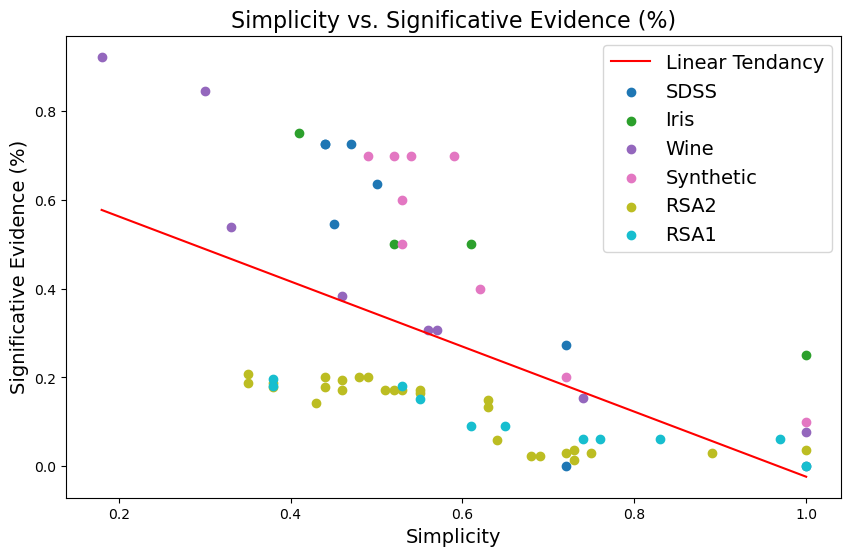

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Create the scatter plot
plt.figure(figsize=(10, 6))

# Get unique datasets
datasets = filtered_df['dataset'].unique()

# Assign colors to datasets
colors = plt.cm.get_cmap('tab10', len(datasets))

# Plot each dataset separately to manage colors and legend
for i, dataset in enumerate(datasets):
    subset = filtered_df[filtered_df['dataset'] == dataset]
    plt.scatter(subset['entropy'], subset['total_significant_shap_counts'], color=colors(i), label=dataset)

# Calculate the line of best fit
x = filtered_df['entropy']
y = filtered_df['total_significant_shap_counts']
coefficients = np.polyfit(x, y, 1)

# Create a polynomial object with the coefficients obtained from the fit
polynomial = np.poly1d(coefficients)

# Generate a number of x values spanning the range of 'entropy' data
x_values = np.linspace(x.min(), x.max(), 100)

# Calculate the y values corresponding to the x values using the polynomial
y_values = polynomial(x_values)

# Plot the line of best fit
plt.plot(x_values, y_values, color='red', label='Linear Tendancy')

# Enhancing title and labels with larger size and bold font
plt.title('Simplicity vs. Significative Evidence (%)', fontsize=16)
plt.xlabel('Simplicity', fontsize=14)
plt.ylabel('Significative Evidence (%)', fontsize=14)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.show()

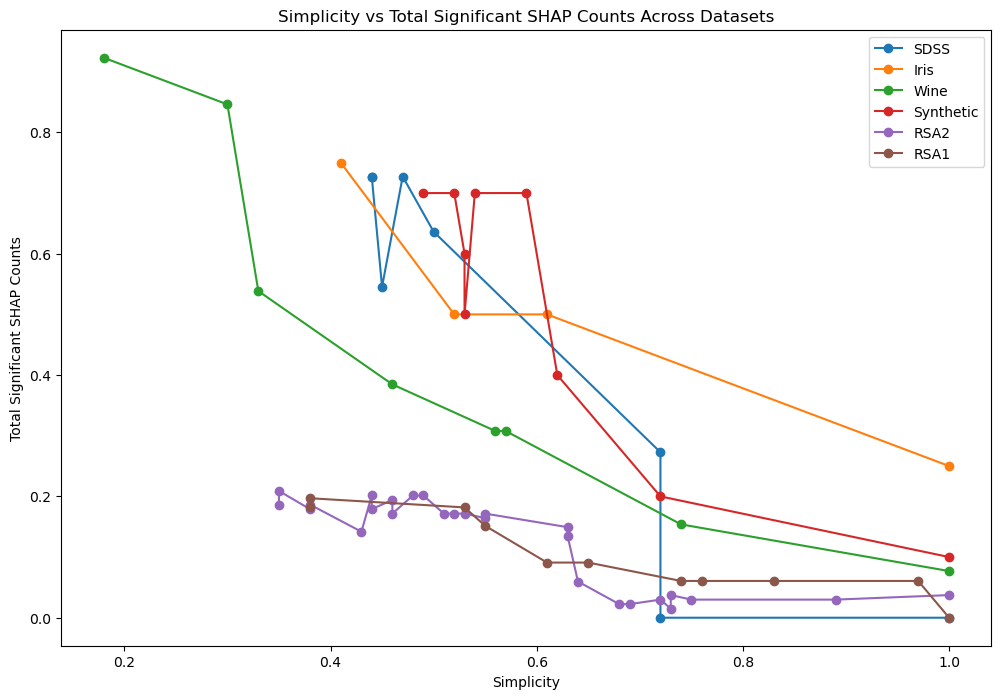

In [24]:
results_df = pd.DataFrame(all_results)

# Plotting
plt.figure(figsize=(12, 8))
for dataset in all_results_df['dataset'].unique():
    subset = all_results_df[all_results_df['dataset'] == dataset]
    entropy_array = np.array(subset['entropy'])
    shap_counts_array = np.array(subset['total_significant_shap_counts'])
    plt.plot(entropy_array, shap_counts_array, marker='o', label=dataset)

plt.xlabel('Simplicity')
plt.ylabel('Total Significant SHAP Counts')
plt.title('Simplicity vs Total Significant SHAP Counts Across Datasets')
plt.legend()
plt.show()



In [25]:
import pandas as pd
import numpy as np
import time
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import ast

def analyze_and_evaluate(df_result, df,name):
    X = df.drop(columns=['target'])
    y = df['target']
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)
    len_x = len(X.columns)
    results = []

    for idx, row in df_result.iterrows():
        dataset = name # Assurez-vous que cette colonne existe dans df_result
        params_str = row['params']
        params = ast.literal_eval(params_str)
        clean_params = {key.replace('rf_', ''): value for key, value in params.items() if key != 'classifier'}
        

        start_time = time.time()
        if params.get('classifier') == 'RandomForest':
            model = RandomForestClassifier(**clean_params)
            model.fit(X_train, y_train)
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_dev)

            significant_shap_counts = []
            for class_shap_values in shap_values:
                vect = np.mean(np.abs(class_shap_values), axis=0)
                sum_I_c_minmax = np.sum(vect)
                I_c_normalized = vect / sum_I_c_minmax
                significant_shap = I_c_normalized > 0.01
                count = np.sum(significant_shap)
                significant_shap_counts.append(count)
                total_significant_shap = np.max(significant_shap_counts)
                percent_significant_shap = np.max(significant_shap_counts)/len_x

        

        end_time = time.time()
        execution_time = end_time - start_time

        results.append({
            'dataset': dataset,
            'execution time': round(execution_time, 3),
            'accuracy': row['accuracy'],
            'entropy': row['entropy'],
            'total significant shap counts': total_significant_shap,
            'percentage of significant features': percent_significant_shap,
            'number of features': len_x
        })

    return results


In [26]:
results_2 = []
for name, df in datasets.items():
    opti_df_2 = mono_datasets[name]
    result_2 = analyze_and_evaluate(opti_df_2, df, name)
    results_2.append(pd.DataFrame(result_2))
final_results_2 = pd.concat(results_2).sort_values(by='entropy', ascending=False)

NameError: name 'mono_datasets' is not defined

In [ ]:
results = []
for name, df in datasets.items():
    opti_df = opti_datasets[name]
    result = analyze_and_evaluate(opti_df, df, name)
    results.append(pd.DataFrame(result))
final_results = pd.concat(results).sort_values(by='entropy', ascending=False)

In [ ]:
final_results.query('dataset == "Wine"').sort_values(by='accuracy', ascending=False)

,dataset,execution time,accuracy,entropy,total significant shap counts,percentage of significant features,number of features
3,Wine,0.077,1.000,0.823,12,0.923077,13
0,Wine,0.085,0.981,0.704,11,0.846154,13
2,Wine,0.008,0.963,0.673,7,0.538462,13
4,Wine,0.008,0.944,0.538,5,0.384615,13
5,Wine,0.008,0.926,0.443,4,0.307692,13
7,Wine,0.008,0.889,0.430,4,0.307692,13
6,Wine,0.008,0.685,0.259,2,0.153846,13
1,Wine,0.008,0.611,0.000,1,0.076923,13


In [ ]:
final_results_2.query('dataset == "Wine"').sort_values(by='accuracy', ascending=False)

,dataset,execution time,accuracy,entropy,total significant shap counts,percentage of significant features,number of features
1,Wine,0.496,0.981481,0.767614,11,0.846154,13
5,Wine,0.455,0.981481,0.767413,11,0.846154,13
3,Wine,0.455,0.981481,0.767028,11,0.846154,13
6,Wine,0.214,0.981481,0.761566,11,0.846154,13
2,Wine,0.642,0.981481,0.759810,11,0.846154,13
4,Wine,0.545,0.981481,0.746835,10,0.769231,13
0,Wine,0.618,0.981481,0.743276,11,0.846154,13
9,Wine,0.363,0.981481,0.742640,10,0.769231,13
7,Wine,0.623,0.981481,0.736648,11,0.846154,13
8,Wine,0.158,0.981481,0.723985,10,0.769231,13


In [ ]:
final_results_2.sort_values(by='accuracy', ascending=False).groupby('dataset').mean()

,execution time,accuracy,entropy,total significant shap counts,percentage of significant features,number of features
dataset,,,,,,
Iris,0.3732,0.977778,0.746762,3.2,0.800000,4.0
RSA1,0.4316,0.723588,0.596086,15.8,0.239394,66.0
RSA2,0.4868,0.704545,0.617073,21.5,0.160448,134.0
SDSS,0.3196,0.922667,0.605056,8.0,0.727273,11.0
Synthetic,0.5911,0.793333,0.504546,7.2,0.720000,10.0
Wine,0.4569,0.981481,0.751682,10.7,0.823077,13.0


In [ ]:
final_results.sort_values(by='accuracy', ascending=False).groupby('dataset').first()

,execution time,accuracy,entropy,total significant shap counts,percentage of significant features,number of features
dataset,,,,,,
Iris,0.359,0.978000,0.586000,3,0.750000,4
RSA1,0.114,0.705000,0.618000,12,0.181818,66
RSA2,1.218,0.729000,0.653000,31,0.231343,134
SDSS,0.142,0.993333,0.561101,8,0.727273,11
Synthetic,0.516,0.787000,0.506000,7,0.700000,10
Wine,0.077,1.000000,0.823000,12,0.923077,13


In [ ]:
aggregated_data = final_results_2.groupby('dataset').agg({
    'accuracy': ['mean', 'std'],
    'entropy': ['mean', 'std'],
    'number of features': 'mean',
    'percentage of significant features': 'mean',
    'total significant shap counts': 'mean',
    'execution time': 'mean'
}).reset_index()

# Flatten the MultiIndex columns and rename for clarity
aggregated_data.columns = [
    'Dataset', 
    'Accuracy Mean', 'Accuracy STD', 
    'Entropy Mean', 'Entropy STD', 
    'Number of Features Mean', 
    'Percentage of Significant Features Mean', 
    'Total Significant SHAP Counts Mean', 
    'Execution Time Mean'
]

In [ ]:
aggregated_data

,Dataset,Accuracy Mean,Accuracy STD,Entropy Mean,Entropy STD,Number of Features Mean,Percentage of Significant Features Mean,Total Significant SHAP Counts Mean,Execution Time Mean
0,Iris,0.977778,0.000000,0.746762,0.006034,4.0,0.800000,3.2,0.3732
1,RSA1,0.723588,0.006346,0.596086,0.021315,66.0,0.239394,15.8,0.4316
2,RSA2,0.704545,0.002624,0.617073,0.011553,134.0,0.160448,21.5,0.4868
3,SDSS,0.922667,0.015361,0.605056,0.041225,11.0,0.727273,8.0,0.3196
4,Synthetic,0.793333,0.000000,0.504546,0.001780,10.0,0.720000,7.2,0.5911
5,Wine,0.981481,0.000000,0.751682,0.015164,13.0,0.823077,10.7,0.4569
